In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import os
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.ensemble import ExtraTreesClassifier
import pickle

# import tensorflow as tf
# from tensorflow.keras import layers, models

# show all columns in a df while using functions like .head()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# to reset option use: pd.reset_option('max_columns')
warnings.filterwarnings("ignore")


def add_spines(colour = '#2d6383', linewidth = 2):
    """
    Add beautiful spines to you plots
    """
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines[['bottom', 'left', 'top', 'right']].set_color(colour)
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(linewidth)

In [4]:
df = pd.read_csv('E:/vscode/TMLC/Higgs Boson/data/training.zip', low_memory=False)
test = pd.read_csv('E:/vscode/TMLC/Higgs Boson/data/test.zip', low_memory=False)
print('Train shape: ', df.shape)
print('Test shape: ', test.shape)

Train shape:  (250000, 33)
Test shape:  (550000, 31)


In [13]:
sns.set_theme(style="darkgrid")
def violin(n, y, top, bottom):
    plt.subplot(2, 3, n+1)
    sns.violinplot(data=df.replace(-999, np.nan), x='PRI_jet_num', y=y, hue="Label",
                   split=True, inner="quart", palette={"s": "g", "b": ".35"}, fill=True, gap=.2)
    add_spines(colour= '#275773', linewidth=1)
    if top is not None:  
        plt.ylim(top=top, bottom=bottom)

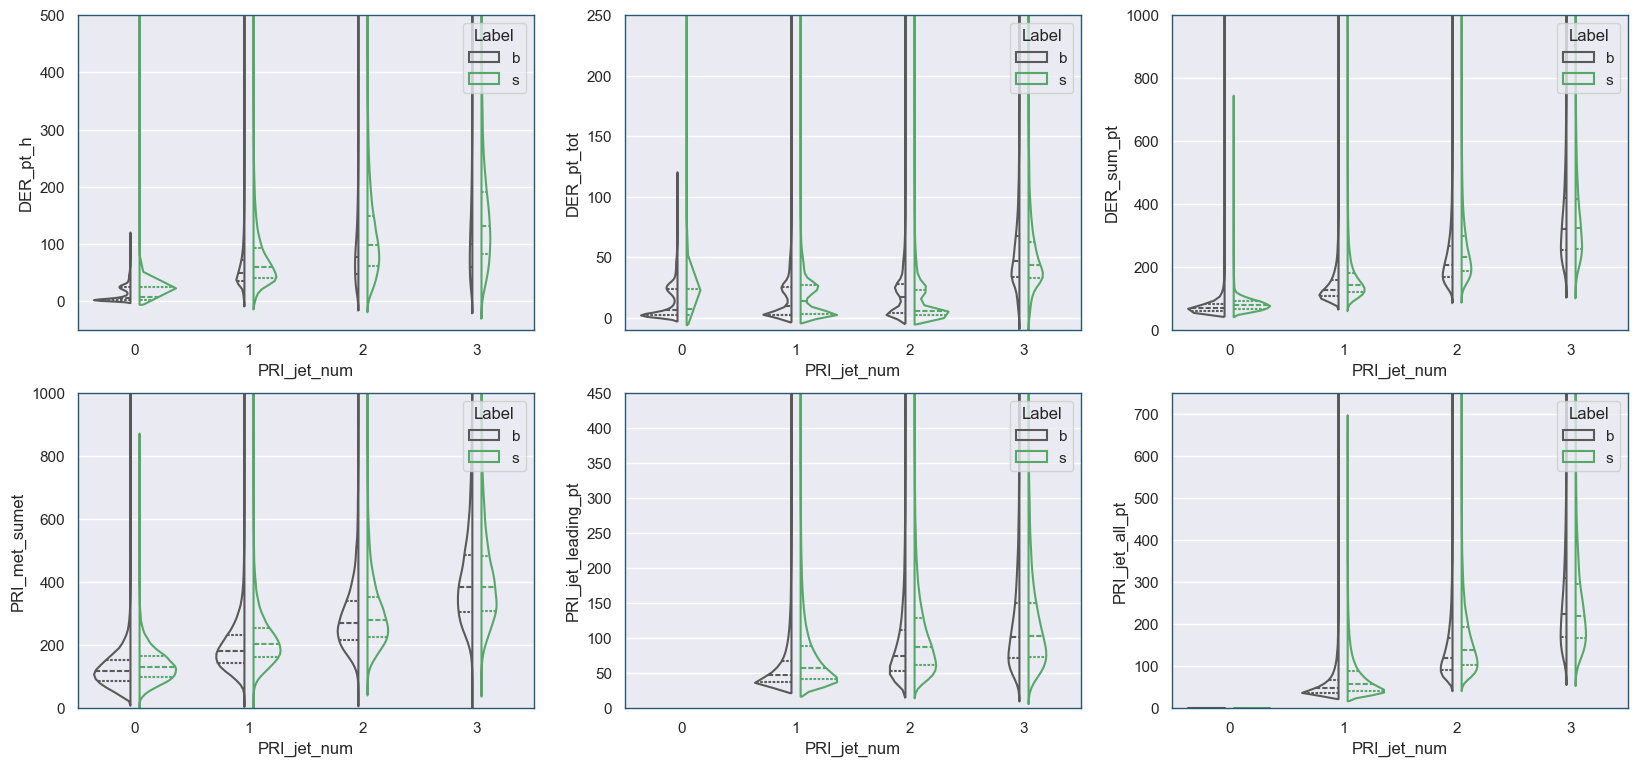

In [14]:
plt.figure(figsize=(20, 9))
columns_selected = [("DER_pt_h", 500, -50),("DER_pt_tot", 250, -10),("DER_sum_pt", 1000, 0),("PRI_met_sumet", 1000, 0),("PRI_jet_leading_pt", 450, 0),("PRI_jet_all_pt", 750, 0)]
for n, y in enumerate(columns_selected):
    violin(n, y[0], y[1], y[2])